In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from os.path import join

In [3]:
filenames = [r"training\normal.csv", r"training\dos.csv", r"training\false.csv", r"training\fuzz.csv", r"training\impersonate.csv", ]
# IDS
for file in filenames:
    frame = pd.read_csv(file)
    print(f"Ids de {file} = {frame['ID'].unique()} | Tamanho = {len(frame['ID'].unique())}")	

Ids de training\normal.csv = ['016' '041' '05C' '014' '056' '008' '00E' '055' '00D' '05B' '015' '017'
 '05D' '007'] | Tamanho = 14
Ids de training\dos.csv = ['000' '00E' '05C' '041' '016' '015' '017' '056' '00D' '05B' '014' '008'
 '055' '05D' '007'] | Tamanho = 15
Ids de training\false.csv = ['00E' '00D' '007' '05B' '014' '008' '055' '05D' '05C' '041' '016' '015'
 '017' '056'] | Tamanho = 14
Ids de training\fuzz.csv = ['099' '049' '055' '083' '004' '0A6' '08F' '00D' '05B' '014' '008' '05D'
 '0BB' '007' '00E' '05C' '041' '016' '015' '017' '056' '01F' '0AB' '0BA'
 '02C' '038' '0B5' '07B' '095' '05A' '04F' '020' '05E' '0C4' '03A' '00B'
 '0C8' '07A' '080' '090' '005' '079' '0C3' '06A' '0C0' '003' '0B7' '088'
 '02A' '06D' '082' '00C' '030' '0B6' '08B' '040' '044' '019' '09B' '09D'
 '046' '052' '07C' '07D' '06C' '011' '04A' '018' '075' '037' '0AF' '024'
 '0A5' '048' '062' '098' '051' '03B' '072' '000' '094' '054' '001' '061'
 '047' '0B2' '0A8' '08D' '097' '070' '03F' '01C' '034' '08E' '058' 

In [4]:
ORDER = ['000', '007', '008', '00D', '00E', '014', '015', '016', '017', '041', '055', '056', '05B', '05C', '05D']
file = pd.read_csv(r"training\normal.csv")

for id in ORDER:
	datas = file[file['ID'] == id]['DATA'].unique()
	print(f'{id}: {datas} with size {len(datas)}')

000: [] with size 0
007: ['01' '00'] with size 2
008: ['01' '00'] with size 2
00D: ['A6D9' 'D2D7' 'FED5' ... '88DA' '2B68' 'D3AF'] with size 10333
00E: ['7AD9' '04D9' 'A6D7' ... '3E5A' 'ACF5' 'CFC2'] with size 10401
014: ['01' '00'] with size 2
015: ['01' '00'] with size 2
016: ['22' '21' '20' '1F' '1E' '1D' '1C' '1B' '1A' '19' '18' '17' '16' '15'
 '14' '13' '12' '11' '10' '0F' '0E' '0D' '0C' '0B' '0A' '09' '08' '07'
 '06' '05' '04' '03' '02' '01' '00' '23' '24' '25' '26' '27' '28'] with size 41
017: ['01' '00'] with size 2
041: ['01' '00'] with size 2
055: ['01' '00'] with size 2
056: ['01' '00'] with size 2
05B: ['A6D9' 'D2D7' 'FED5' ... 'A036' '2B68' 'D3AF'] with size 10332
05C: ['EFD9EFD9' '7AD97AD9' '04D904D9' ... 'CD3AC53A' '77007600' '1C471B47'] with size 10717
05D: ['01' '00'] with size 2


# Checar Frames Falsos

In [5]:
# Ver quantos dos arquivos Falsos tem
frame_false = pd.read_csv(r"training\false.csv")
frame_normal = pd.read_csv(r"training\normal.csv")

falses = frame_false[frame_false['NORMAL'] == False]
print(f"Ids falsos {falses['ID'].unique()}")

# Após rodar
frame_normal =  frame_normal[frame_normal['ID'] == '00E']
frame_false =  frame_false[frame_false['ID'] == '00E']
print(f"{len(frame_normal)} e {len(frame_false)}")

frame_false_values = frame_false['DATA'].values
frame_false_values = np.array([int(x, 16) for x in frame_false_values])
frame_false_mean = frame_false_values.mean()
print(frame_false_mean)

Ids falsos ['00E']
299086 e 251792
1.0130978374406369e+18


In [6]:
false_values_data, false_values_normal = [], []
for i, row in enumerate(frame_false.itertuples()):
	data, normal = row.DATA, row.NORMAL
	valor = int(data, 16)
	if valor < 1e19: 
		false_values_data.append(int(data, 16))
		false_values_normal.append(normal)
false_colors = ['b' if x else 'r' for x in false_values_normal]

Text(0.5, 1.0, 'VALORES FALSIFY')

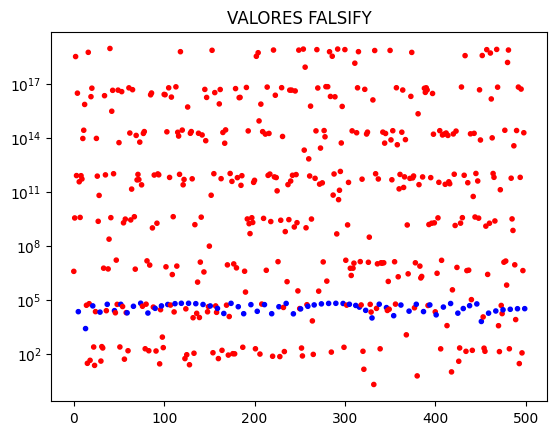

In [7]:
plt.scatter(np.arange(len(false_values_data[:500])), false_values_data[:500], c=false_colors[:500], marker='.')
plt.yscale('log')
plt.title("VALORES FALSIFY")

# Checar frames de impersonation

In [8]:
frame_normal =  pd.read_csv(r"training\normal.csv")
frame_impersonate =  pd.read_csv(r"training\impersonate.csv")

print(f"IDs alterados {frame_impersonate[frame_impersonate['NORMAL'] == False]['ID'].unique()}")

IDs alterados ['05C']


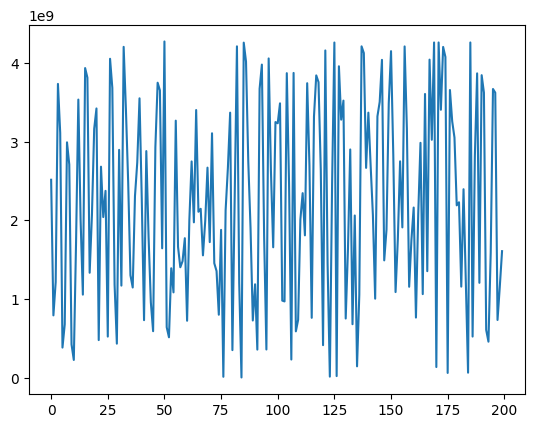

In [9]:
separar = frame_impersonate[frame_impersonate['ID'] == '05C']['DATA'].values
separar = [int(x, 16) for x in separar]
plt.plot(np.arange(len(separar[0:200])), separar[0:200])

In [10]:
real_impersonate = frame_impersonate[(frame_impersonate['NORMAL'] == True) & (frame_impersonate['ID'] == '05C')]['DATA'].values
false_impersonate = frame_impersonate[frame_impersonate['NORMAL'] == False]['DATA'].values

real_impersonate = [int(x, 16) for x in real_impersonate]
false_impersonate = [int(x, 16) for x in false_impersonate]

Text(0.5, 1.0, 'VALORES IMPERSONATE')

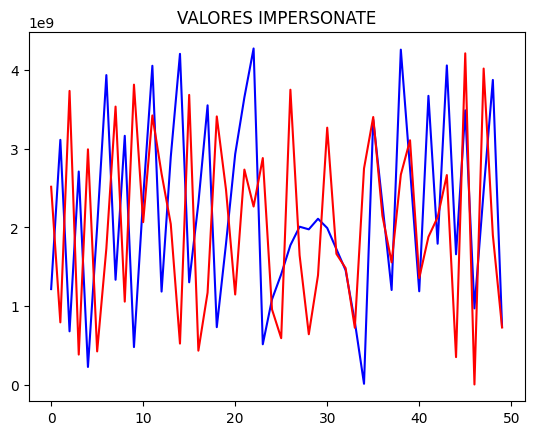

In [15]:
plt.plot(np.arange(len(real_impersonate[0:50])), real_impersonate[0:50], color = 'b')
plt.plot(np.arange(len(false_impersonate[0:50])), false_impersonate[0:50], color = 'r')
plt.title("VALORES IMPERSONATE")

# Análise de Fuzz

In [12]:
frame_fuzz = pd.read_csv(r"training\fuzz.csv")
normal_ids = frame_fuzz[frame_fuzz['NORMAL'] == True]['ID'].unique()
false_fuzz = frame_fuzz[frame_fuzz['NORMAL'] == False]['ID'].unique()

print(np.intersect1d(normal_ids, false_fuzz))
print(f"IDs alterados {frame_fuzz[frame_fuzz['NORMAL'] == False]['ID'].unique()}")

['007' '008' '00D' '00E' '014' '015' '016' '017' '041' '055' '056' '05B'
 '05C' '05D']
IDs alterados ['099' '049' '055' '083' '004' '0A6' '08F' '0BB' '05D' '01F' '008' '0AB'
 '0BA' '02C' '038' '0B5' '07B' '095' '05A' '04F' '020' '05E' '0C4' '03A'
 '00B' '0C8' '07A' '080' '090' '005' '079' '0C3' '06A' '0C0' '003' '0B7'
 '088' '02A' '06D' '082' '00C' '030' '0B6' '016' '08B' '040' '044' '019'
 '09B' '09D' '00E' '046' '052' '07C' '07D' '06C' '011' '04A' '018' '075'
 '037' '0AF' '024' '0A5' '048' '062' '098' '051' '03B' '072' '000' '094'
 '054' '001' '061' '047' '0B2' '0A8' '08D' '014' '097' '070' '03F' '01C'
 '017' '034' '08E' '058' '05F' '025' '08C' '022' '074' '009' '0BF' '007'
 '04E' '0A1' '012' '02F' '092' '0A0' '084' '078' '0C2' '09F' '043' '027'
 '064' '0BD' '032' '0C7' '0A4' '01B' '04C' '0BC' '002' '033' '00A' '03E'
 '039' '085' '06B' '02B' '0B4' '04B' '05C' '07F' '0A2' '081' '063' '0A3'
 '0B0' '041' '093' '04D' '0B1' '060' '069' '028' '0AD' '013' '026' '09A'
 '0AA' '068' '09E' '0AE